# K Nearest Neighbors (KNN)

K-Nearest Neighbors is a **non-parametric**, **lazy** learning algorithm. 

What does this mean?

- **Non-parametric models** make no underlying assumptions about the distribution of data
- **Lazy learners** (or **instance-based** learning methods) simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made
    - In other words, no training is necessary! This makes training super fast but testing is slower and costly

### What should the grey point be?

![example scenario](images/scenario.png)

## KNN has the following basic steps:

![knn process](images/knn-process.png)

**The algorithm can be summarized as:**

1. A positive integer `k` is specified
2. We select the `k` entries in our training data which are closest to the new sample
3. We find the most common classification of these entries (voting)
4. This is the classification we give to the new sample

**A few other features of KNN:**

* KNN stores the entire training dataset which it uses as its representation
* KNN does not learn any model parameters
* KNN makes predictions 'just-in-time' by calculating the similarity between an input sample and each training instance

**Note:** KNN performs better with a low number of features. The more features you have the more data you need. You increase the dimensions everytime you add another feature. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

Resource on the Curse of Dimensionality for classification: https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

### Voting

How to break ties:

1. When doing a binary classification, often use a odd `k` to avoid ties.
2. Multiple approaches for multi-class problems:
    - Reduce the `k` by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

This example uses a multi-class problem and each color represents a different class.

![data overview](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

## Distance Metrics

### What are distance metrics? 

Formulas that can be used to measure the distance between our variables 

![](https://miro.medium.com/max/1400/1*FlMiuoENrq52tMV4S6LSZg.png)

* Euclidean and Manhattan distance are typically best for continuous variables 

## Implementing the KNN Classifier with SKlearn

For reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [3]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('data/diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


[Following this analysis for part of this section](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

Can the minimum value of these columns be zero (0)?

- On these columns, a value of zero does not make sense and thus indicates a missing value

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[zero_cols] = diabetes[zero_cols].replace(0, np.NaN)

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


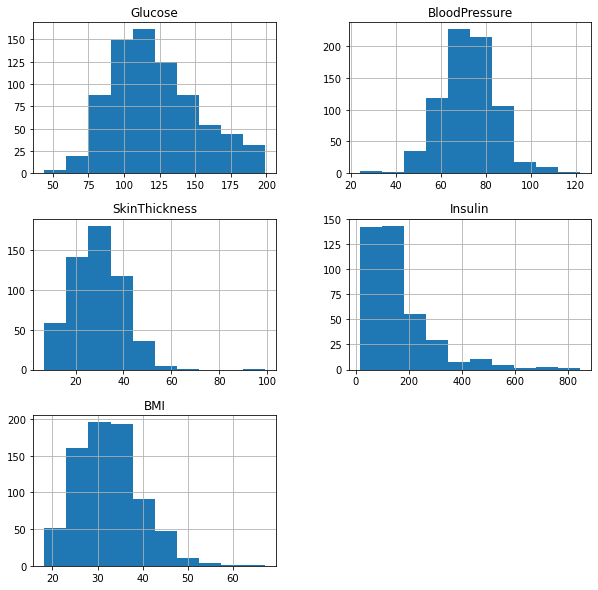

In [13]:
# Using distributions to decide imputation strategy
import matplotlib.pyplot as plt
diabetes[zero_cols].hist(figsize=(10,10))
plt.show()

In [14]:
diabetes[zero_cols].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [13]:
# Check class imbalance
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
268/len(diabetes)

0.3489583333333333

In [18]:
used_cols = [c for c in diabetes.columns if c not in ['Outcome']]

X = diabetes[used_cols]
y = diabetes['Outcome']

In [19]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Time to handle data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [21]:
scaler = StandardScaler()
imputer = SimpleImputer(strategy='median')

In [22]:
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_processed = scaler.fit_transform(X_train_imp)
X_test_processed = scaler.transform(X_test_imp)

In [24]:
# And now, modeling!
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test_processed)

In [29]:
# calculate accuracy
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_class):.4f}')
print(f'F1: {metrics.f1_score(y_test, y_pred_class):.4f}')

Accuracy: 0.7656
F1: 0.6617


In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

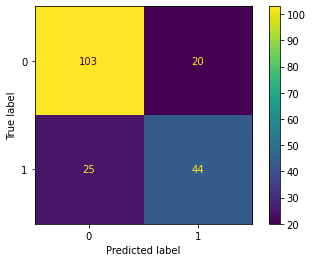

In [31]:
plot_confusion_matrix(knn, X_test_processed, y_test)

## Using a different value for K

In [32]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train_processed, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test_processed)

In [34]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_class):.4f}')
print(f'F1: {metrics.f1_score(y_test, y_pred_class):.4f}')

Accuracy: 0.7917
F1: 0.6875


In [35]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.75      0.64      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



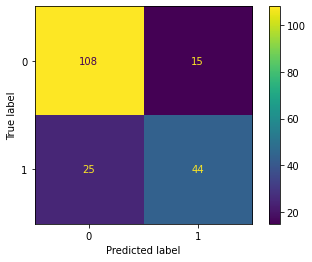

In [36]:
plot_confusion_matrix(knn, X_test_processed, y_test)

### Search for an optimal value of `k` for KNN


In [43]:
k_range = list(range(1, 20, 2)) # testing odd ks between 1 and 19
k_train_scores = []
k_test_scores = []

for k in k_range:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_processed, y_train)
    
    train_preds = knn.predict(X_train_processed)
    test_preds = knn.predict(X_test_processed)

    #Compute f1score on the training set
    k_train_scores.append(metrics.f1_score(y_train, train_preds))  
    #Compute f1score on the test set
    k_test_scores.append(metrics.f1_score(y_test, test_preds))  

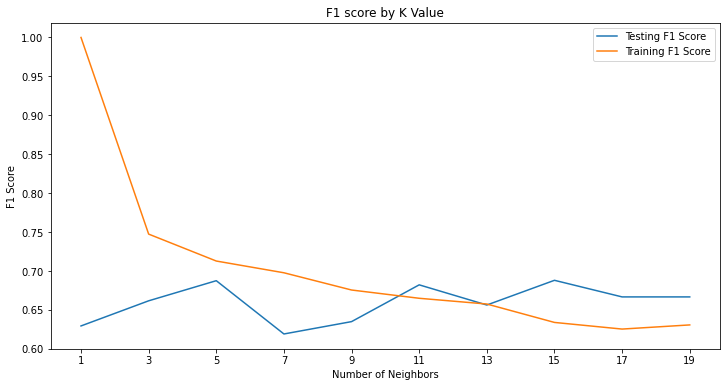

In [53]:
#Generate plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_test_scores, label='Testing F1 Score')
plt.plot(k_range, k_train_scores, label='Training F1 Score')
plt.title('F1 score by K Value')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.xticks(k_range)
plt.legend()
plt.show()

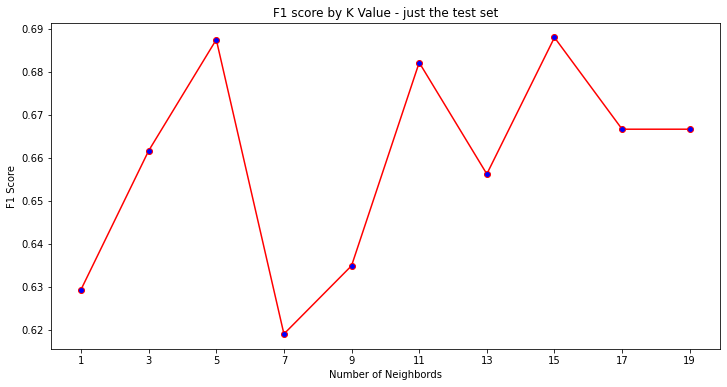

In [54]:
# zoom in just on test scores
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_test_scores, color='red', marker='o',  
         markerfacecolor='blue')
plt.title('F1 score by K Value - just the test set')  
plt.xlabel('Number of Neighbords')  
plt.ylabel('F1 Score') 
plt.xticks(k_range)
plt.show()

### What value of K performs best on our Test data?

Here we use F score, what other metrics could we use?

### How do you think K size relates to our concepts of bias and variance?

![bias variance notes](images/K-NN_Neighborhood_Size_print.png)

## Review - Pros and Cons of KNNs 

**Pros:**
- No assumptions about data — useful, for example, for nonlinear data
- Simple algorithm — to explain and understand/interpret
- High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
- Versatile — useful for classification or regression

**Cons:**
- Computationally expensive — because the algorithm stores all of the training data
- High memory requirement
- Stores all (or almost all) of the training data
- Prediction stage might be slow (with big N)
- Sensitive to irrelevant features and the scale of the data

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)
    
- [Curse of Dimensionality](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)